In [1]:
# Default Libraries
import os
import StringIO

# External Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from IPython.display import FileLink, FileLinks

# Own Libraries
import rstoolbox  # Learn about this library at: http://lpdi-epfl.github.io/rstoolbox

import readme

# Global Parameters
plt.rcParams['svg.fonttype'] = 'none'
rstoolbox.utils.format_Ipython()

# Design of a RSVF site IV carrier from TOP7

> This summary does not track all attempts and variations, just the pathway towards obtaining the designs that were experimentally characterized.

In [2]:
# Direct information obtain from scoring TOP7 with Rosetta
baseline = rstoolbox.io.get_sequence_and_structure(os.path.join('selection', 'baseline', '1qys.pdb'))
baseline

,score,fa_atr,fa_rep,fa_sol,fa_intra_rep,fa_intra_sol_xover4,lk_ball_wtd,fa_elec,pro_close,hbond_sr_bb,hbond_lr_bb,hbond_bb_sc,hbond_sc,dslf_fa13,omega,fa_dun,p_aa_pp,yhh_planarity,ref,rama_prepro,time,description,sequence_A,structure_A,phi_A,psi_A
0,191.625,-498.177,194.188,320.719,1.444,19.121,-7.686,-112.63,0.0,-29.587,-31.008,-2.424,-4.577,0.0,0.935,296.765,-8.478,0.0,22.146,30.876,2.0,1qys_0001,DIQVQVNIDDNGKNFDYTYTVTTESELQKVLNELKDYIKKQGAKRVRISITARTKKEAEKFAAILIKVFAELGYNDINVTFDGDTVTVEGQL,LEEEEEEEELLLLEEEEEEEELLLLHHHHHHHHHHHHHHHHLLLEEEEEEELLLHHHHHHHHHHHHHHHHHLLLLEEEEEEELLEEEEEEEL,"[0.0, -91.4576, -100.939, ...]","[-165.465, 111.061, 116.221, ...]"


## Generation of fragments to guide the folding process

Structure-based fragments to guide the folding were generated applying the RosettaScript [mkfragments](design/mkfragments.xml) to `1QYS`, the PDB containing **TOP7**.

## Making the designs

The construction of the **TOP7**-derived designs implies the grafting to RSVF's site IV epitope with the presence of its neutralizing antibody 101F [motif.pdb](design/motif.pdb).

The process is split in several steps.

### Folding

Site IV was grafted into **TOP7** by means of the _NubInitioMover_ with the RosettaScript [ffl.xml](design/ffl.xml) into a [SLURM](https://slurm.schedmd.com/)-based cluster through the submiter script [submit_ffl.sh](design/submit_ffl.sh).

A total of 800 decoys were generated without allowing for any sequence mutation to the template residues. The aim of this firts run was to explore and find a folded conformation that would:

* carry and stabilize at backbone level site IV.
* fold back to a conformation close to **TOP7** keeping the proper beta pairing.
* shift enought the conformation to be productive in presenting site IV to 101F (avoid clashes).

From all the decoys, [87_ffl_twostrand_1qys_Lys_0001](design/87_ffl_twostrand_1qys_Lys_0001.pdb) was selected as seed for the next step of the process. The values of this decoy in the context of the design population are marked with a red line.

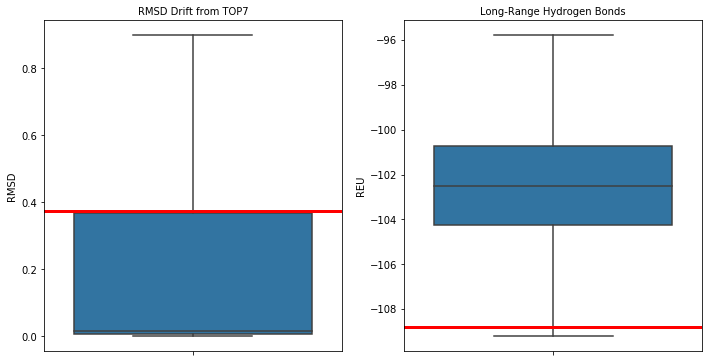

In [3]:
step1 = rstoolbox.io.parse_rosetta_file('design/top7_ffl_folding.minisilent.gz')
readme.plot_step1(step1)

### Full Design

Full design was carried out applying to [87_ffl_twostrand_1qys_Lys_0001](design/87_ffl_twostrand_1qys_Lys_0001.pdb) the RosettaScript [design_full.xml](design/design_full.xml) submited via the SLURM script [submit_design_full.sh](design/submit_design_full.sh), generating a total of 92 designs from which [sd_top7_12top7_graft_0001](design/sd_top7_12top7_graft_0001.pdb) (highlighted in red in the distributions) was selected.

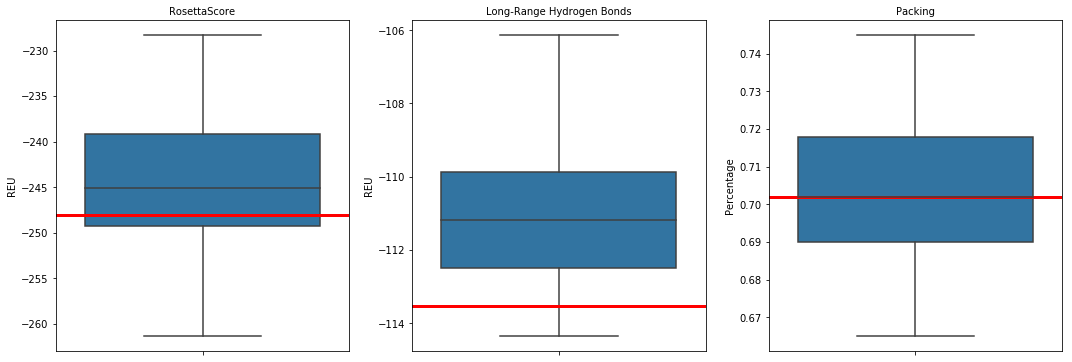

In [4]:
fulldes = rstoolbox.io.parse_rosetta_file('design/sd_top7_', {'sequence': 'P'})
readme.plot_full(fulldes)

### Part Design

Partial design was carried out applying to [87_ffl_twostrand_1qys_Lys_0001](design/87_ffl_twostrand_1qys_Lys_0001.pdb) the RosettaScript [design_part.xml](design/design_part.xml) submited via the SLURM script [submit_design_part.sh](design/submit_design_part.sh), generating a total of 100 designs from which [sd_top7_nterm2_45top7_graft_0002](design/sd_top7_nterm2_45top7_graft_0002.pdb) (highlighted in red in the distributions) was selected.

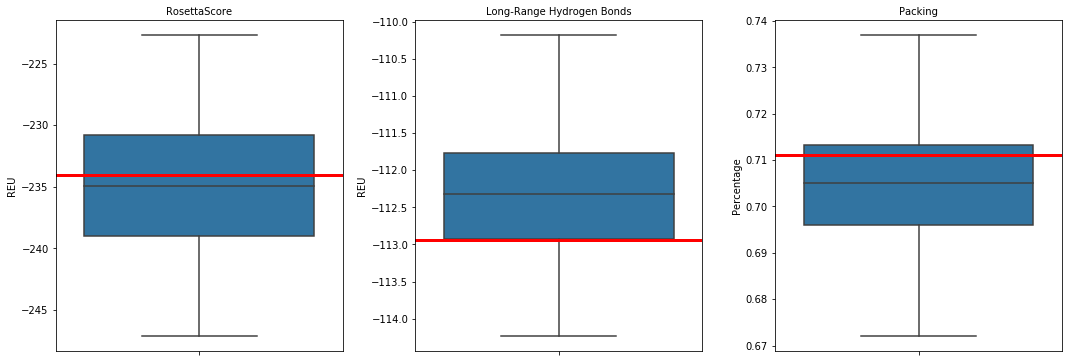

In [5]:
partdes = rstoolbox.io.parse_rosetta_file('design/sd_top7_nterm2_', {'sequence': 'P'})
readme.plot_part(partdes)

### Remodel and Resurface

Both selected designs were submited to REMODEL to shorten the first loop of the structure and fix surface residues in order to improve the quality of the decoys, yielding the final two designs as described in the paper.

# Experimental Data

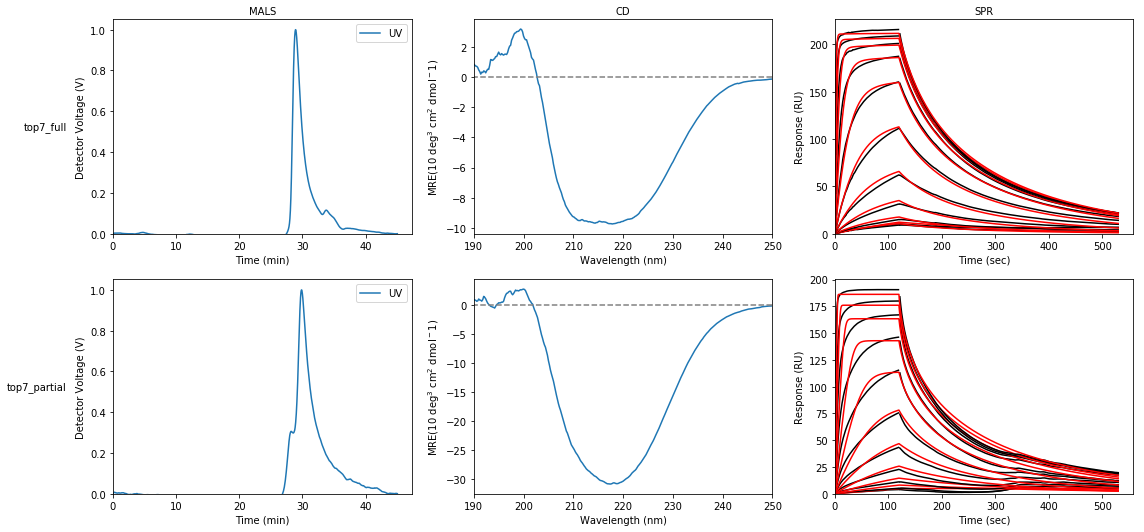

In [6]:
designs = readme.load_experimental()
readme.data_plot(designs)
